# 6주차 | 4.8.2022(금)

공지사항:

- 중간 22일 11시 or 11시 30분(시험시간 30분)
- 대면, 장소는 추후 공지. 일주일 전 코드 공개, 팀원끼리 상의 가능하고 외워서 종이에 적어내기

### NLTK Corpus

In [61]:
# nltk brown, inaugural
import nltk
nltk.download(['inaugural', 'brown'])

[nltk_data] Downloading package inaugural to /Users/kwak/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package brown to /Users/kwak/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [62]:
brown = nltk.corpus.brown

In [6]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)
genres = brown.categories()[:5]
modals = ['can', 'could', 'will', 'would', 'may', 'might']
cfd1.tabulate(conditions=genres, samples=modals)

                 can could  will would   may might 
     adventure    46   151    50   191     5    58 
belles_lettres   246   213   236   392   207   113 
     editorial   121    56   233   180    74    39 
       fiction    37   166    52   287     8    44 
    government   117    38   244   120   153    13 


In [8]:
# genre별로 modal의 빈도수를 가진 cfd
cfd2 = nltk.ConditionalFreqDist(
    (genre, modals) # modals와 genre를 바꾸면 x축 y축이 바뀜
    for genre in brown.categories()
    for modals in ['can', 'could', 'will', 'would', 'may', 'might']
    
    for word in brown.words(categories=genre) # for word가 필요한 이유: genre와 modals를 이어줌
        if word.lower() == modals # startswith은 안되는 이유: candidate같은 단어도 포함될 수 있음
)
cfd2.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


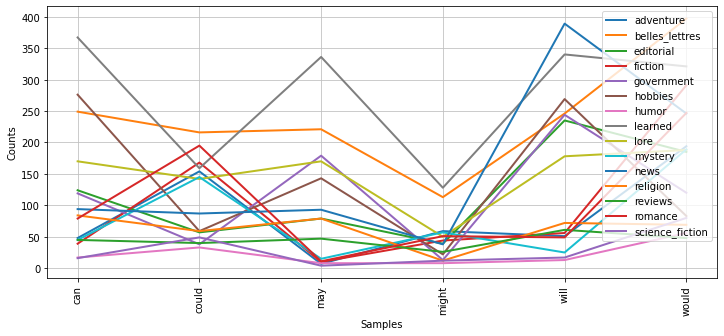

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
cfd2.plot()

### Inaugural
- 연설문 데이터

In [3]:
inaugural = nltk.corpus.inaugural

In [5]:
inaugural.fileids()[:5] #fileids만 사용 가능. 연도-이름.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt']

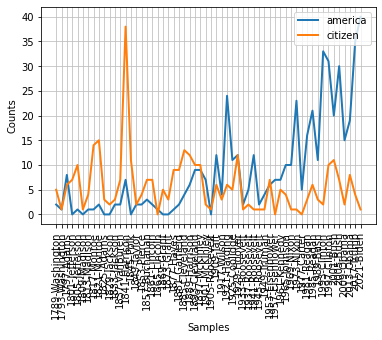

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [23]:
# inaugural에서 america, citizen의 빈도수, 연도별로
cfd3 = nltk.ConditionalFreqDist(
    (target_word, fileid[:-4])
    for target_word in ['america', 'citizen']
    for fileid in inaugural.fileids()
    
    for word in inaugural.words(fileids=fileid)
        # if target_word.lower() == modals
        if word.lower().startswith(target_word) # american, citizens, citizenship 과 같은 단어들까지 모두 포함하므로 더 정확함
)
cfd3.plot()

### Tuple & List

### 1. 생성하기

In [24]:
emptyT = ()
emptyT = tuple()

emptyL = []
emptyL = list()

emptyT, emptyL

((), [])

#### 1.1. 요소가 2개 이상일 때

In [25]:
listA = ['a', 'b']

tupleA = 'a', 'b' #괄호 없이 더 많이 씀
tupleA = ('a', 'b')

tupleA, listA

(('a', 'b'), ['a', 'b'])

#### 1.2. 요소가 1개일 때

In [27]:
listA = ['a']

tupleA = ('a',) # comma가 붙어야 함
tupleA = 'a',

ex = ('a')
type(ex)

str

### 2. 여러 변수 할당하기
- packing: 한 변수에 여러 개의 데이터를 할당하는 것
    - 리스트, 튜풀 자체가 packing임.
- Unpacking: 여러 변수에 하나의 데이터를 할당하는 것. 그것을 각각의 변수로 변환하는 것
    - a, b, c = [1, 2, 3]

In [29]:
name = 'lee'
a, b, c = name
a, b, c # unpacking 작업.

('l', 'e', 'e')

In [30]:
# 값 교환
pwd = 'abcd'
userId = 'hello'

# pwd = 'hello', userId = 'abcd' 바꾸려면
#  temp1 = pwd     temp란 새 변수를 활용해서
#  temp2 = userId  4줄에 걸쳐 할당해야 함
#  pwd = temp2
#  userId = temp1

pwd, userId = userId, pwd # tuple을 활용하면 4줄이 1줄로 줄어듦

### 3. 연산
- 리스트와 튜플 동일함

In [31]:
('a',) + ('b', 'c') # 요소가 하나 뿐인 튜플로 만들려면 반드시 콤마(,)를 사용해야 함.

('a', 'b', 'c')

In [33]:
('a', 'b') * 4

('a', 'b', 'a', 'b', 'a', 'b', 'a', 'b')

In [8]:
a = 1, 2
b = 1, 3

a, b # 첫 번째 인자끼리 비교, 같으면 그 뒤 인자끼리 비교

((1, 2), (1, 3))

### 4. 순회하기

In [10]:
a = 1, 2, 3, 4, 5
for i in a:
    print(i)

1
2
3
4
5


### 5. list comprehension
- tuple? (x)

In [12]:
#1.
# a = (1, 2, 3, 4, 5)
tuple([word for word in a])#순회는 되기 때문

#2.
*[word for word in a], # *[], = tuple, 하지만 느려서 안씀

(1, 2, 3, 4, 5)

### 6. 튜플은 불변 객체이다.
- a = 1, 2, 3, 4
- a += 5 안됨
- 코드 수정할 때 튜플 수정할 수 없게 하는 용도로 사용함.
- key값을 저장할 때
- 메모리 사용이 적다는 장점

In [13]:
a = 1,
b = 1, 2, 3
id(a), id(b), id (a + b) # 두 튜플을 더한다고 수정하는게 아니라 새 id에 할당해버림

(140657008093696, 140657058614784, 140657058656144)

### 7. 형 변환
- tuple()
- ()

In [41]:
tuple('cat'), ['cat']

(('c', 'a', 't'), ['cat'])

In [42]:
list('cat'), ['cat']

(['c', 'a', 't'], ['cat'])

In [23]:
list [1], [2] # ??

(list[1], [2])

### List 관련 함수

#### 1. 항목 변경하기

In [12]:
days = ['월', '화', '수', '목']

# 'fri' 추가하기
days.append('fri') #할당이 필요없고, 값이 바로 적용됨
days

['월', '화', '수', '목', 'fri']

In [13]:
days.insert(2, 'sat') #원하는 offset을 지정할 수 있다.
days

['월', '화', 'sat', '수', '목', 'fri']

In [14]:
# 병합하기
listA = ['토', '일']
days.extend(listA)
print(days)
days.append(listA)
print(days)

['월', '화', 'sat', '수', '목', 'fri', '토', '일']
['월', '화', 'sat', '수', '목', 'fri', '토', '일', ['토', '일']]


In [15]:
days += listA #가능, +=는 extend랑 같음
print(days)

['월', '화', 'sat', '수', '목', 'fri', '토', '일', ['토', '일'], '토', '일']


In [16]:
# offset
days[-3] = '공휴일'
days

['월', '화', 'sat', '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [17]:
days[:3] = 1,2 # 개수 달라도 상관 없음.
days

[1, 2, '수', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [18]:
days[:3] = 'cat'
days

['c', 'a', 't', '목', 'fri', '토', '일', '공휴일', '토', '일']

In [19]:
# a = 1, 2, 3, 4, 5
a = list(range(1, 6))

### 삭제하기

In [60]:
#1. offset
del days[0] # 자리가 보존되지 않고 아이템이 하나씩 앞당겨짐
days

['a', 't', '수', '목', 'fri', '공휴일', '일', ['토', '일']]

In [61]:
#2. 특정한 값 삭제
days.remove('a') # 가장 처음 것만 삭제
days

['t', '수', '목', 'fri', '공휴일', '일', ['토', '일']]

In [63]:
#3. pop(index), default= -1: 맨 마지막 요소를 삭제
days.pop() #뭐가 삭제됐는지 보여줌

'일'

In [65]:
#clear - 다 삭제
days.clear() 
days

[]

### 값 찾기

In [41]:
a = list(range(5))
a.index(2)

2

In [42]:
# 값 확인
3 in a

True

### 정렬하기
- 리스트.sort(reverse): 기존 값을 변경함
- sorted(리스트, reverse): 정렬된 복사본을 반환, 기존 값에는 영향 x
- 리스트.reverse()
- reversed(리스트)

In [43]:
b = sorted(a, reverse=True)

In [44]:
b.sort()
b

[0, 1, 2, 3, 4]

In [45]:
b.reverse()

In [46]:
c = list(reversed(b))
c

[0, 1, 2, 3, 4]

### 할당하기
- =으로 할당할 때에는 하나가 변하면 같이 변함(같은 메모리 주소를 참조하고 있기 때문)
- shallow copy
    - a가 변해도 b가 변하지 않게 하는 복사
    - 리스트.copy()
    - list(리스트)
    - 리스트[:]
    - 중첩된 리스트들은 서로 참조하기 때문에 영향을 줘버림
- deep copy

In [39]:
a.reverse()

In [47]:
b = a # [0, 1, 2, 3, 4]에 a, b가 메모리 주소를 참조함
b[0] = 7
b

[7, 1, 2, 3, 4]

In [48]:
a # a도 바뀜

[7, 1, 2, 3, 4]

In [49]:
id(a), id(b) # memory 주소가 같은 모습

(140657059346048, 140657059346048)

In [52]:
# shallow
b = a.copy()    # .copy()를 쓰거나
c = list(a)     # list(복사하고자 하는 리스트),
d = a[:]        # a[:]

In [53]:
a.append([6,7,8]) # 2차원 리스트
a

[7, 1, 2, 3, 4, [6, 7, 8]]

In [56]:
e = a.copy()
id(e), id(a)

(140657058659392, 140657059346048)

In [57]:
a[-1][0] = 0
a, e            # shallow copy로 메모리 주소는 달라졌지만 여전히 값이 공유됨

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 8]])

In [58]:
import copy
f = copy.deepcopy(a)
f

[7, 1, 2, 3, 4, [0, 7, 8]]

In [60]:
f[-1][-1] = 9
a, f            # a는 변하지 않는 모습

([7, 1, 2, 3, 4, [0, 7, 8]], [7, 1, 2, 3, 4, [0, 7, 9]])

### 순회하기
- zip(): 여러 개 리스트 동시 순회
- enumerate(): 인덱스도 함께 돌고자 할 때(list, range)
- range()

In [62]:
a = [1, 2, 3]
b = ['mon', 'tue', 'wed', 'thu']

for itemA, itemB in zip(a, b):     # a, b 아이템 수가 같지 않을 때는 수가 적은 시퀀스에서 완료됨
    print((itemA, itemB))

(1, 'mon')
(2, 'tue')
(3, 'wed')


In [63]:
list(zip(a, b))

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

In [64]:
dict(zip(a, b))

{1: 'mon', 2: 'tue', 3: 'wed'}

In [65]:
for index, itemA in enumerate(b):  # 리스트 하나만 사용, 그 리스트의 인덱스값과 value를 꺼내 사용할 수 있음
    print((index, itemA))

(0, 'mon')
(1, 'tue')
(2, 'wed')
(3, 'thu')


### List Comprehension

In [66]:
ex = [(nal, day) for nal, day in zip(a, b)]
ex

[(1, 'mon'), (2, 'tue'), (3, 'wed')]

#### 연습
- 리스트 -> for문으로
- for문을 사용하여 ex를 구현하기
    - a, b

In [67]:
result = []
for nal, day in zip(a, b):
    result.append((nal, day))   # 한번 더 감싸줘야 함

print(result)

[(1, 'mon'), (2, 'tue'), (3, 'wed')]


In [68]:
[(nal, day) for nal in a for day in b] # nal과 day를 zip()으로 묶지 않았기 때문에 nal과 day가 따로 돎

[(1, 'mon'),
 (1, 'tue'),
 (1, 'wed'),
 (1, 'thu'),
 (2, 'mon'),
 (2, 'tue'),
 (2, 'wed'),
 (2, 'thu'),
 (3, 'mon'),
 (3, 'tue'),
 (3, 'wed'),
 (3, 'thu')]

In [105]:
sentence = "don't judge a book by its cover"
# [(대문자, 타이틀, 글자 수)] 로 저장된 리스트로 만들어라.
[(word.upper(), word.title(), len(word)) for word in sentence.split()]

[("DON'T", "Don'T", 5),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [69]:
# 문제2
text = [
    ['hello', 'guys'],
    ['how', 'are', 'you']
]

#2.1. 문장으로 구성된 리스트로 만들기
    # ['hello guys', 'how are you']
[" ".join(word) for word in text]

#2.2. 전체 단어를 하나의 리스트로 가져오기
    # ['', '', '', '', '']
[word for word_li in text for word in word_li]

#2.3. 전체를 스트링으로 가져오기
    # 'hello guys how are you'
[' '.join([word for word_li in text for word in word_li])]

['hello guys how are you']

In [237]:
brown.raw(categories='romance')[:5000] #=> list of words, sentence split 남긴 형태로 list comprehension+for loop, text형태로

"\n\n\tThey/ppss neither/cc liked/vbd nor/cc disliked/vbd the/at Old/jj-tl Man/nn-tl ./.\nTo/in them/ppo he/pps could/md have/hv been/ben the/at broken/vbn bell/nn in/in the/at church/nn tower/nn which/wdt rang/vbd before/in and/cc after/in Mass/nn-tl ,/, and/cc at/in noon/nn ,/, and/cc at/in six/cd each/dt evening/nn --/-- its/pp$ tone/nn ,/, repetitive/jj ,/, monotonous/jj ,/, never/rb breaking/vbg the/at boredom/nn of/in the/at streets/nns ./.\nThe/at Old/jj-tl Man/nn-tl was/bedz unimportant/jj ./.\n\n\n\tYet/rb if/cs he/pps were/bed not/* there/rb ,/, they/ppss would/md have/hv missed/vbn him/ppo ,/, as/cs they/ppss would/md have/hv missed/vbn the/at sounds/nns of/in bees/nns buzzing/vbg against/in the/at screen/nn door/nn in/in early/jj June/np ;/. ;/.\nor/cc the/at smell/nn of/in thick/jj tomato/nn paste/nn --/-- the/at ripe/jj smell/nn that/wps was/bedz both/abx sweet/jj and/cc sour/jj --/-- rising/vbg up/rp from/in aluminum/nn trays/nns wrapped/vbn in/in fly-dotted/jj cheeseclo

브라운코퍼스에서 romance 장르 raw 앞에서 5000개 선택
- 문장 분절 있는 토큰 리스트로 만들기
- 리스트컴프리헨션, 포문 사용해서 불필요한 것들 제거하기

[
 ['They', 'neither', 'liked', ...],
 [],
]

In [89]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [234]:
# brown 정제하기 ver.1(나의 풀이)
brown = nltk.corpus.brown
romance_raw = brown.raw(categories="romance")[:5000]             # => brown.raw()했을 때 단어 뒤에 무조건 '/'와 str이 붙고, 문장이 끝나는 기준은 역슬래쉬 '\'가 올 때마다이다.

# 1. POS tag 정제
romance_words = romance_raw.replace('/', ' ').split()            # .split() 구분자를 특정하지 않을 때 공백 뿐만 아니라 \n, \t도 자동으로 걸러준다.
del romance_words[1::2]                                          # POS tag는 모든 words 뒤에 확정적으로 따라오기 때문에 짝수번째에 위치해있다.

# 2. 하이픈으로 이어진 단어들 쪼개기
list2 = ' '.join(romance_words).replace('-', ' ').split()        # 하이픈('-') 공백으로 교체 후 분절함.

# 3. apostrophe 's, 't => '\s', 'not'으로 변환하기
for word in list2[::-1]:                                         # 잎에서부터 삭제해버리면 인덱스가 앞으로 당겨져서 삭제 안되는 부분이 생김. 뒤에서부터 삭제하면 앞으로 진행할 인덱스들에 영향이 없어짐.
    if "'s" in word:
        index = list2.index(word)
        list2[index : index + 1] = word.split("'")
        list2[index + 1] = "\\'s"                                # 's는 is인지 has인지 구분하기 어려우므로 따로 변환 안함.
    elif "'t" in word:
        index = list2.index(word)
        list2[index : index + 1] = word.split("n'")
        list2[index + 1] = 'not'                                 # n't는 not의 줄임말이므로 not으로 바꿔줌.

# 4. 특수 문자 지우고, '.' 기준으로 리스트 묶기
list3 = [word.replace('.', '문장나누기dot')\
         .replace('!', '문장나누기dot')\
         .replace('?', '문장나누기dot') for word in list2]          # 특수 문자들을 지우기 전에, 문장을 분절하는 기준인 온점을 alphabet으로 끝나는 구별 가능한 문자열로 먼저 replace 해준다

list4 = [word for word in list3 if word[-1].isalpha()]           # 문장 분절 기준을 확실히 한 후 특수 문자 제거, 이 때 \'s는 살려야 하므로 첫글자가 alpha로 시작하는게 아닌 끝 글자를 기준으로 판별해준다.

sent_list = ' '.join(list4).split('문장나누기dot')                  # 이후 쪼개져있는 단어들을 문자열 하나로 합친 뒤 미리 정해둔 문장 분절 기준으로 다시 split해준다.

final_result = [sent.split() for sent in sent_list\
                if len(sent) > 1]                                # 올바르게 분절된 하나의 문자열을 남아있는 공백을 기준으로 다시 분절해주면 정제 완료, 이 때 느낌표로 공백 리스트가 생성되기 때문에 len()으로 걸러줌.
print(final_result)

[['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man'], ['To', 'them', 'he', 'could', 'have', 'been', 'the', 'broken', 'bell', 'in', 'the', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', 'and', 'at', 'noon', 'and', 'at', 'six', 'each', 'evening', 'its', 'tone', 'repetitive', 'monotonous', 'never', 'breaking', 'the', 'boredom', 'of', 'the', 'streets'], ['The', 'Old', 'Man', 'was', 'unimportant'], ['Yet', 'if', 'he', 'were', 'not', 'there', 'they', 'would', 'have', 'missed', 'him', 'as', 'they', 'would', 'have', 'missed', 'the', 'sounds', 'of', 'bees', 'buzzing', 'against', 'the', 'screen', 'door', 'in', 'early', 'June', 'or', 'the', 'smell', 'of', 'thick', 'tomato', 'paste', 'the', 'ripe', 'smell', 'that', 'was', 'both', 'sweet', 'and', 'sour', 'rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'in', 'fly', 'dotted', 'cheesecloth'], ['Or', 'the', 'surging', 'whirling', 'sounds', 'of', 'bats', 'at', 'night', 'when', 'their', 'black', 'bodies', '

In [238]:
# brown 정제하기 ver.2(내 미완성 풀이 + 다른 분들의 코드 참조)
# brown.raw()의 5000번째 글자인 'f' 살리지 못함, 세미콜론으로 이어지는 문장이 적절히 이어지지 못하고 분절되는 문제 발생

# 1. .split('\n')으로 문장 단위로 나눠주기
romance_sents = brown.raw(categories="romance")[:5000].split('\n') # 구분자를 특정하지 않을 때 공백 뿐만 아니라 \n, \t도 자동으로 걸러준다.

romance_list = [sent.split() for sent in romance_sents if len(sent) > 1]

# 2. /이후 알파벳 지우기
temp1 = [[word[:word.index('/')] for word in sent if '/' in word] for sent in romance_list]

# 3. 콤마 등 기호들 지우기
temp2 = [[word for word in sent if word[0].isalpha()] for sent in temp1] # word.isalpha()는 fur-piece를 지워버림. 그걸 피하려면 '첫글자'만 알파벳으로 시작하는지 확인하면 된다!

# 4. 하이픈으로 연결된 단어들 분리하기
# https://blog.winterjung.dev/2017/04/21/list-of-lists-to-flatten
# temp3 = [[sent[sent.index(word), sent.index(word)+1] = word.split('-') if '-' in word else word for word in sent] for sent in temp2]
for sent in temp2:
    for word in sent[::-1]: # 잎에서부터 삭제해버리면 인덱스가 앞으로 당겨져서 삭제 안되는 부분이 생김. 뒤에서부터 삭제하면 앞으로 진행할 인덱스들에 영향이 없어짐.
        if '-' in word:
            index = sent.index(word)
            sent[index : index + 1] = word.split('-')

# 5. apostrophe s => \'s 로 분리하기 + didn't / shouldn't => 'do', 'not' / 'should', 'not'
for sent in temp2:
    for word in sent[::-1]:
        if "\'s" in word:
            index = sent.index(word)
            sent[index : index + 1] = word.split("'")
            sent[index + 1] = "\\'s"
        elif "\'t" in word:
            index = sent.index(word)
            sent[index : index + 1] = word.split("n'")
            sent[index + 1] = 'not'
print(temp2)

[['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man'], ['To', 'them', 'he', 'could', 'have', 'been', 'the', 'broken', 'bell', 'in', 'the', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', 'and', 'at', 'noon', 'and', 'at', 'six', 'each', 'evening', 'its', 'tone', 'repetitive', 'monotonous', 'never', 'breaking', 'the', 'boredom', 'of', 'the', 'streets'], ['The', 'Old', 'Man', 'was', 'unimportant'], ['Yet', 'if', 'he', 'were', 'not', 'there', 'they', 'would', 'have', 'missed', 'him', 'as', 'they', 'would', 'have', 'missed', 'the', 'sounds', 'of', 'bees', 'buzzing', 'against', 'the', 'screen', 'door', 'in', 'early', 'June'], ['or', 'the', 'smell', 'of', 'thick', 'tomato', 'paste', 'the', 'ripe', 'smell', 'that', 'was', 'both', 'sweet', 'and', 'sour', 'rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'in', 'fly', 'dotted', 'cheesecloth'], ['Or', 'the', 'surging', 'whirling', 'sounds', 'of', 'bats', 'at', 'night', 'when', 'their', 'black', 'bodies',

In [110]:
import sys
print(sys.version)

3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]


In [118]:
print(str := 'hello')

hello


In [144]:
print(" 백슬래시 출력 \\ ")

 백슬래시 출력 \ 


In [148]:
print(r" 백슬래시 출력 \ ")

 백슬래시 출력 \ 


In [236]:
# brown 정제하기 ver.3
# 코드 재사용률이 높고, 하나의 for문 안에서 정제를 완료할 수 있어 좋은 코드임.

# 조사 뺀 스트링 만들기
raw_words = brown.raw(categories='romance')[:5000].replace('!','.').split() # 문장 분절을 위해 !를 .로 바꾸고 공백을 기준으로 단어 분절한 리스트 ex-"the/aa" 
array = [] #조인을 위한 리스트 만들어주기
for word in raw_words: # word.split('/')[0] 는 조사를 뺀 word 하나가 들어간 string ex-"man"
    if word.split('/')[0].isalpha() or word.split('/')[0] == '.':
        array.append(word.split('/')[0]) # 그대로 들어가는 것들
        
    elif '-' in word.split('/')[0]:
        array.append(word.split('/')[0].replace('-',' ')) # - 를 공백으로 변환해 넣어줌 ex-"fur-price" => "fur price"
        
    elif "'" in word.split('/')[0] and len(word.split('/')[0]) > 2:
        if "n't" in word.split('/')[0]: # ex- don't, did't 
            array.append(word.split('/')[0].replace("n't"," not"))
        elif "'s" in word.split('/')[0]: #ex- It's
            array.append(word.split('/')[0].replace("'s"," 's"))
            
string = " ".join(array)

#'.' 기준으로 문장 & 단어 분절 (단어는 공백 기준)
sentences = []
sentences = [sent.split() for sent in string.split(".") if len(sent.split()) > 0 ]
print(sentences)

## 확인해보기: 문장 단위로 나눠 출력
for sent in sentences:
    for word in sent:
        print(word,end=" ")
    print()
    print("**********")

[['They', 'neither', 'liked', 'nor', 'disliked', 'the', 'Old', 'Man'], ['To', 'them', 'he', 'could', 'have', 'been', 'the', 'broken', 'bell', 'in', 'the', 'church', 'tower', 'which', 'rang', 'before', 'and', 'after', 'Mass', 'and', 'at', 'noon', 'and', 'at', 'six', 'each', 'evening', 'its', 'tone', 'repetitive', 'monotonous', 'never', 'breaking', 'the', 'boredom', 'of', 'the', 'streets'], ['The', 'Old', 'Man', 'was', 'unimportant'], ['Yet', 'if', 'he', 'were', 'not', 'there', 'they', 'would', 'have', 'missed', 'him', 'as', 'they', 'would', 'have', 'missed', 'the', 'sounds', 'of', 'bees', 'buzzing', 'against', 'the', 'screen', 'door', 'in', 'early', 'June', 'or', 'the', 'smell', 'of', 'thick', 'tomato', 'paste', 'the', 'ripe', 'smell', 'that', 'was', 'both', 'sweet', 'and', 'sour', 'rising', 'up', 'from', 'aluminum', 'trays', 'wrapped', 'in', 'fly', 'dotted', 'cheesecloth'], ['Or', 'the', 'surging', 'whirling', 'sounds', 'of', 'bats', 'at', 'night', 'when', 'their', 'black', 'bodies', '

### 연습장

In [239]:
type(1)

int

In [240]:
type(1) == int

True

In [8]:
li = ['q', '12 q', '  q', ']]]]q', 'quiz']
[w[(ind:=w.index('q')):ind+1] for w in li if 'q' in w]

['q', 'q', 'q', 'q', 'q']

In [4]:
mode3_switch = True
mode3_func = False
correct_n = ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'q']



while mode3_switch:    
    n1 = input('구구단을 시작할 숫자를 입력하세요. 종료하시려면 q를 입력해주세요.')
    n2 = input('구구단 종료 숫자를 입력하세요. 종료하시려면 q를 입력해주세요.')
    if len(n1) != 1 or len(n2) != 1:
        print("잘못된 입력값입니다. 다시 입력하세요.")
        continue
    elif n1 not in correct_n or n2 not in correct_n:
        print("잘못된 입력값입니다. 1부터 9 사이의 자연수나 q를 입력하세요.")
        continue
    elif correct_n[-1] in n1 or correct_n[-1] in n2:
        while ask := input("입력값에서 'q'를 발견하였습니다. 정말로 끝내시겠습니까? 끝내시려면 'q'를, 계속하시려면 'c'를 눌러주세요."): # 여러 개 숫자를 입력하다 만약에 종료하고 싶지 않은데 q를 눌러버렸을 경우의 필터링
            if ask == 'q':
                mode3_switch = False
                print("이용해주셔서 감사합니다.")
                break
            elif ask == 'c':
                break
            else:
                print("'q'나 'c' 중 하나만 입력해주세요.")
                continue
    elif int(n1) > int(n2):
        while compare_2num := input('구구단을 시작할 숫자가 종료 숫자보다 큽니다. 숫자를 뒤집어 실행하시겠습니까? (y/n) (exit:q)'):
            if compare_2num == 'y':
                n1, n2 = n2, n1
                mode3_func = True
                mode3_switch = False
                break
            elif compare_2num == 'n':
                print('입력란으로 다시 돌아갑니다.')
                break
            elif compare_2num == 'q':
                print("이용해주셔서 감사합니다.")
                mode3_switch = False
                break
            else:
                print("'y'나 'n' 중 하나만 입력해주세요.")
                continue
    else:
        mode3_func = True
        mode3_switch = False
        break
        
if mode3_func:
    for i in range(int(n1), int(n2) + 1):
        print(f'--- {i}단 ---')
        for j in range(1, 10):
            print(f'{i} x {j} = {i * j}')
    print('수행을 종료합니다.') 

구구단을 시작할 숫자를 입력하세요. 종료하시려면 q를 입력해주세요. 3
구구단 종료 숫자를 입력하세요. 종료하시려면 q를 입력해주세요. 5


--- 3단 ---
3 x 1 = 3
3 x 2 = 6
3 x 3 = 9
3 x 4 = 12
3 x 5 = 15
3 x 6 = 18
3 x 7 = 21
3 x 8 = 24
3 x 9 = 27
--- 4단 ---
4 x 1 = 4
4 x 2 = 8
4 x 3 = 12
4 x 4 = 16
4 x 5 = 20
4 x 6 = 24
4 x 7 = 28
4 x 8 = 32
4 x 9 = 36
--- 5단 ---
5 x 1 = 5
5 x 2 = 10
5 x 3 = 15
5 x 4 = 20
5 x 5 = 25
5 x 6 = 30
5 x 7 = 35
5 x 8 = 40
5 x 9 = 45
수행을 종료합니다.


In [25]:
start = 1
end = 3
if type(start) == int and type(end) == int:
    print('yes')
else:
    print('no')

yes


In [39]:
li = [1, 2, 3, 4, 5]
n1 = 7
n2 = 3
numli = [n1, n2]
for num in numli:
    if num not in li:
        print('no')
    else:
        print('yes')

no
yes


In [2]:
n1 = 1
n2 = 2
n1, n2 = n2, n1
print(n1, n2)

2 1


In [ ]:
while mode3_switch:=True:
    n1 = input('구구단을 시작할 숫자를 입력하세요. 종료하시려면 q를 입력해주세요.')
    n2 = input('구구단 종료 숫자를 입력하세요. 종료하시려면 q를 입력해주세요.')
    mode3_func = False
    if len(n1) != 1 or len(n2) != 1:
        print("잘못된 입력값입니다. 다시 입력하세요.")
        continue